# 数据读取和准备工作

In [1]:
import shap
import pandas as pd
import xgboost as XGBR
import matplotlib.pyplot as plt
plt.style.use('seaborn')
shap.initjs()

print("start")

# plt.rcParams["font.sans-serif"] = ["SimHei"]
# plt.rcParams['axes.unicode_minus']=False

basepath="D:\OneDrive - whut.edu.cn\活动文件\大三\大三下活动文件\数据统计与分析竞赛\代码"
modelame = "test-0.78941"
dataname = "Data4Predict"

data = pd.read_csv(f"{basepath}/Data/{dataname}.csv")
model = XGBR.Booster(model_file=f"{basepath}/Predict/Model/XGBoost/{modelame}.model")

x = data.drop(["result"], axis=1)
y = data["result"]

col = data.columns.tolist()

explainer = shap.TreeExplainer(model,x)
shap_values = explainer(x)
print("done!")

D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

start
100%|===================| 134834/135159 [01:23<00:00]       done!


## summary plot

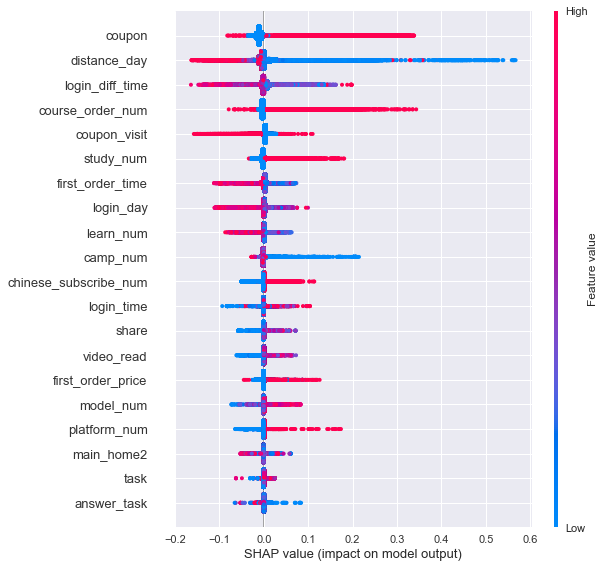

In [2]:
shap.summary_plot(shap_values, x)

start
not enough data in bin #2 for feature first_order_price, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #4 for feature first_order_price, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #9 for feature first_order_price, so it'll be ignored. Try increasing the number of records to plot.
not enough data in bin #12 for feature first_order_price, so it'll be ignored. Try increasing the number of records to plot.


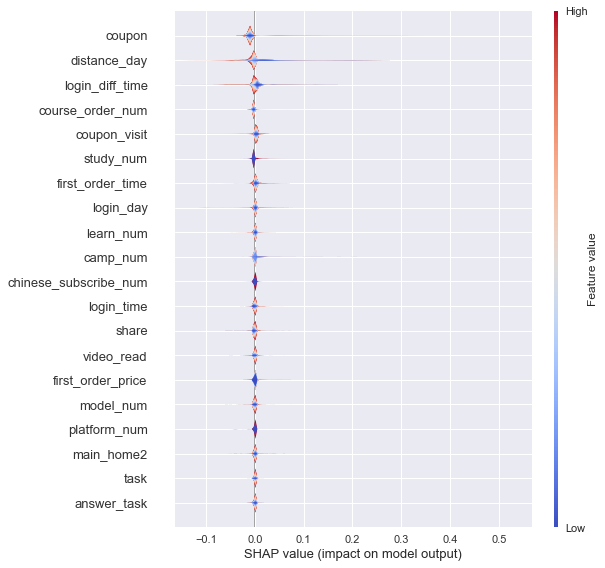

In [3]:
print("start")
shap.summary_plot(shap_values,x, plot_type="layered_violin",color='coolwarm')

## dependence plot

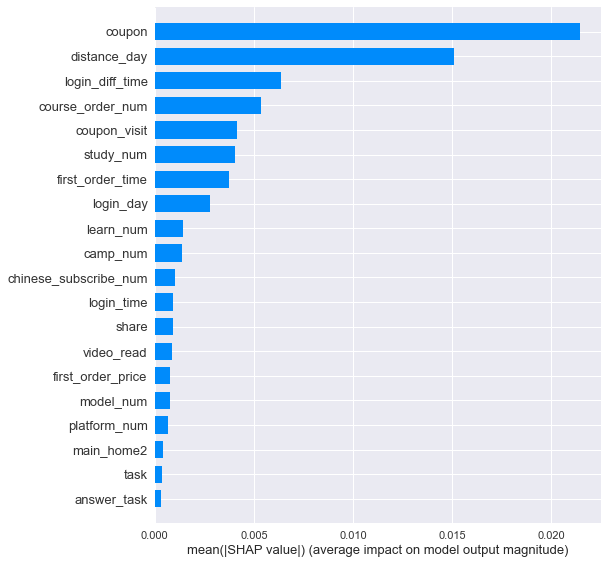

In [4]:
shap.summary_plot(shap_values, x, plot_type="bar")

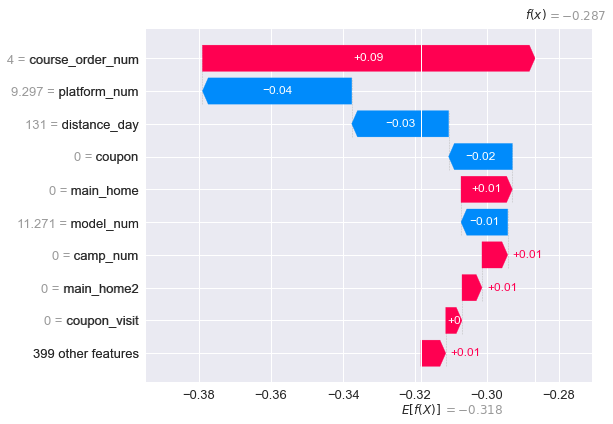

In [5]:
shap.plots.waterfall(shap_values[0])

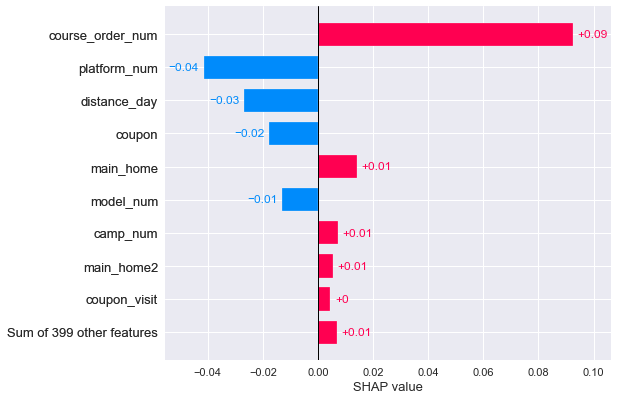

In [6]:
shap.plots.bar(shap_values[0])

In [7]:
shap.plots.force(shap_values[1])

In [8]:
shap.dependence_plot(shap_values[:,"coupon"], color=shap_values)

AttributeError: 'NoneType' object has no attribute 'shape'

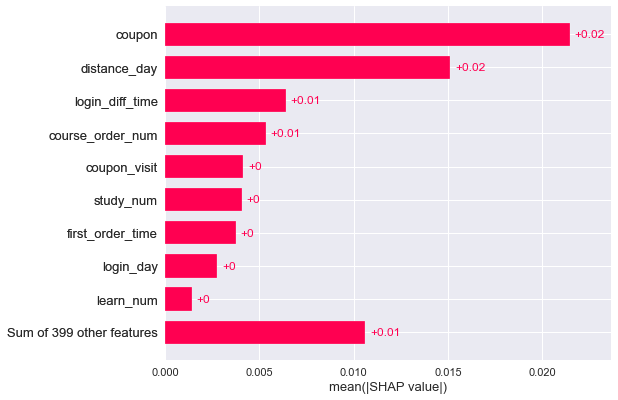

In [51]:
shap.plots.bar(shap_values)

In [ ]:
for name in x.columns[:49]:
    shap.plots.scatter(shap_values[:,name], color=shap_values[:,"platform_num"])

In [ ]:
for name in x.columns[:49]:
    shap.plots.scatter(shap_values[:,name], color=shap_values[:,"model_num"])